# Binary Classification Performance Eval Example: "Is 5?"

In [30]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
mnist = fetch_openml("mnist_784")

In [14]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

In [18]:
def plot_digit(image_data):
    image = image_data.values.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

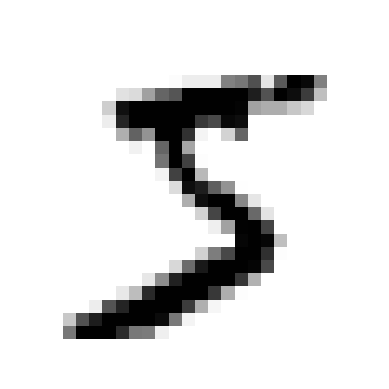

In [19]:
some_digit = X.iloc[0]
plot_digit(some_digit)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
y_train_5 = y_train == "5"
y_test_5 = y_test == "5"

In [22]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [23]:
sgd_clf.predict([some_digit])

/Users/yarik/vc_projects/ML/ml-code/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [28]:
# accuracy isn't the preferred performance metric when dealing with skewed datasets, instead we use a confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)

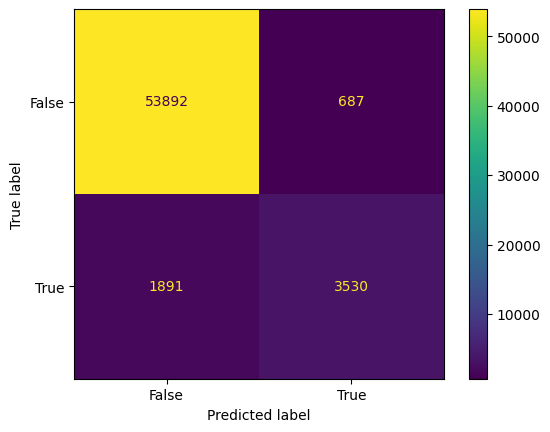

In [29]:
# sometimes I like to see the cm percentages instead of the counts
cm_percent = np.round(cm / cm.sum(axis=1)[:, np.newaxis] * 100, 2)

ConfusionMatrixDisplay.from_predictions(
    y_train_5, y_train_pred, display_labels=["Not 5", "5"], confusion_matrix=cm_percent
)
# ConfusionMatrixDisplay.from_estimator(sgd_clf, X_train, y_train_5)
plt.show()